<a href="https://colab.research.google.com/github/Maribuoo/Final_Ad_Program/blob/main/Final_Mariyam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import essectial files before starting 
import numpy as np #Python library used for working with arrays
import matplotlib.pyplot as plt #  cross-platform, data visualization and graphical plotting library  for plotting graphs
import seaborn as sns #library that uses Matplotlib underneath to plot graphs
import pandas_profiling #delivers an extended analysis of a DataFrame while alllowing the data analysis to be exported in different formats such as html and json.
import pandas as pd #Python library used for working with data sets
import plotly.offline as po 
import plotly.graph_objs as go
%matplotlib inline

In [ ]:
#need to read the dataset
df= pd.read_csv('/content/final_churn.csv')#imported to colab and just copied the path 


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()
#looking at the columns/varibales in list to easily analyze them 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Now my goal is to see how many clients was churned in this dataset
df["Churn"].value_counts() #because the last column named churn

No     5174
Yes    1869
Name: Churn, dtype: int64

Analyze: 1/4 part of the people was churned which means that there is an issue of classification dataset with skewed class proportions which means that I can create the biased learning models that have lower prediction accuracy over minority classes than majority classes.

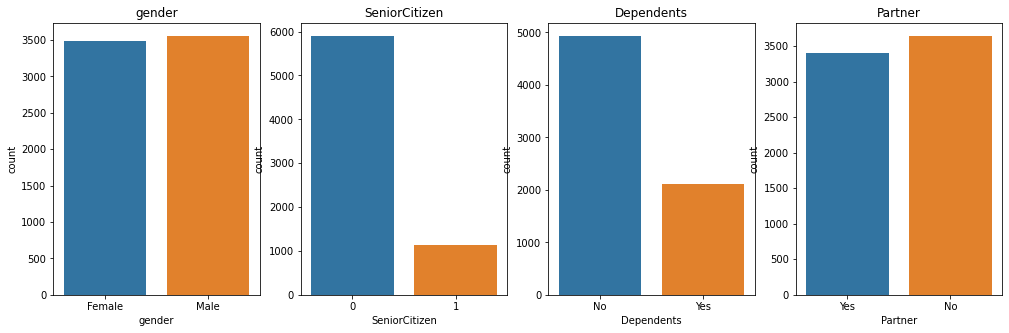

In [ ]:
#the continuation of basic analyze of data
#as I noticed in the fest for columns the information about people 
#particlualrly dividing them into the groups
cols = ['gender','SeniorCitizen',"Dependents" ,"Partner"]
numerical = cols

plt.figure(figsize=(17,5))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")

According to the graphics , we can easily say that the gender and partner distribution among the clients are almost equal . However the is a little amount of seniorCitizens and dependents who are the young people mostly.

The the next columns mostly about the amount of money spent on the different services 

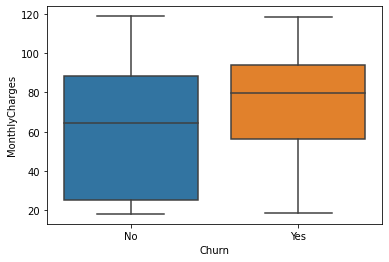

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df) #very basic plot Boxplots are used to visualize distributions
#So I am trying to see the distribution of quantitative data of services cost

Now we see that the people who have churned had more montlycharges than the one who left . It is logically understandable that charge for a month should be lower in order to save the customers.

For now I will try to analyze the consequences of other factors to the churn 

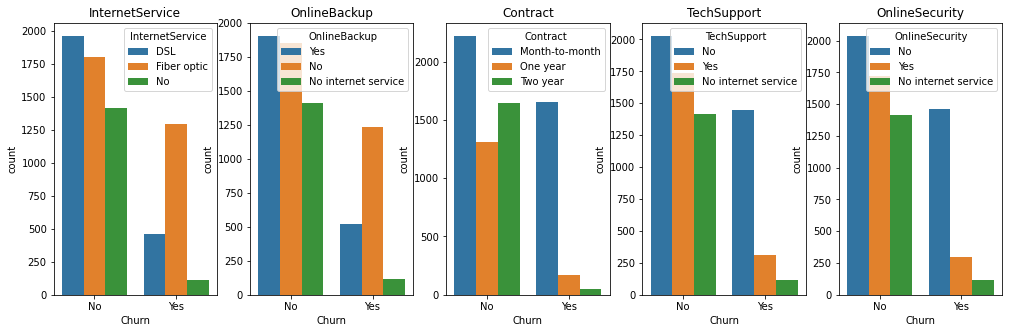

In [ ]:
cols = ['InternetService',"OnlineBackup","Contract", "TechSupport", "OnlineSecurity"]

plt.figure(figsize=(17,5))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

I chose 5, as I think , the most important factors that could have an effect to churn rate.because I saw the other graphs of other factors, they wasnt as clear as these 5.

Internetservice: We can see that the fiber optic internet is badly affects to the customers, the reason is not written, but I can assume that it is because of low quality or expensive cost for them.

Onlinebackup:most of the customers who churned had not the onlinebackup for their data. So maybe this company have to include it as necessary. 

Contract: As it is seen in the graph, when customers pay every month, they can easily cancel the subscription than paying once in 1 or 2 year.

TechSupport:Who didn't have the technical support was churned. Probably because of technical issues.

Last but not least:OnlineSecurity: The ones who didn't have the online security were churned.Logically we can understand that it could lead to security issues that lead to increase of churn rate.

I chose these 5 factors in order to just analyze the situation that is leading to increase of churn which can be helpful in the next stages.

Now accroding to the plan in my proposal I will clean the dataset

Firsly ,as we can see in the totalcharge column, the data type is object , but it will be better to chnage it to the integer but we will write to_numeric function in pandas to convert to int64.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
#using dropna() to get rid of NaN values.


In [ ]:
#for  machine learning we firstly need to encode the not integere columns' values by converting them to numeric values.
colu_values = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

colu_values.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
from sklearn import preprocessing

Me = preprocessing.LabelEncoder()

df_colu = colu_values.apply(Me.fit_transform)
df_colu.head()


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
#after creating new dataframe I need to add these to the previouse
num_values= df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
lastdf = pd.merge(num_values, df_colu, left_index=True, right_index=True)

In [ ]:
lastdf.head()

,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,0,1,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,1889.50,56.95,0,34,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,108.15,53.85,0,2,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,1840.75,42.30,0,45,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,151.65,70.70,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


Start of the training process.

but before starting I faced the problem. it is connected to with imbalanced dataset,as I said before , because of the fact that only (approximately) 1/4 of the customers were churned.Machine could  fail to do as well as expected, because it will predict that customers will not churn due to high level (3/4) unchurned customer. 

To solve this issue , I decided to do oversampling. It is helpful due to the choosing the samples for training set rendomly from minor class. we will continue overampling before the number of minor class will be equal for major class.


In [ ]:
from sklearn.model_selection import train_test_split

lastdf = lastdf.dropna()
lastdf = lastdf.drop(['customerID'],axis=1) # I didn't do the over sampling, it is just test of splitting now

X = lastdf.drop(['Churn'],axis=1)
y = lastdf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# and right here I could do the over sampling of the data for training

from imblearn.over_sampling import SMOTE

oversamp = SMOTE(k_neighbors=5)
X_smote, y_smote = oversamp.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

No 5174
Yes 1869

These are the previous results of churn , BUT NOW it should be equals which means in each 3452

In [ ]:
y_train.value_counts()

0    3452
1    3452
Name: Churn, dtype: int64

Now I need a model 

"Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features." from https://builtin.com/data-science/random-forest-algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

The evaluaion of the model by checking the accurcay score.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

preds = rf.predict(X_test)
rf_accuracy=round(metrics.accuracy_score(y_test, preds) * 100, 2)
print(rf_accuracy)

77.29


In this step I could finish but I would like to explore other models that could have greater accuracy than Random Forest

In [ ]:
#other model libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier




In [ ]:
#Support Vector Machine Model

vecmodel = SVC( random_state=46)
vecmodel.fit(X_train,y_train)
#predicion
vec_pred = vecmodel.predict(X_test)

#accuracy
vec_accuracy = round(metrics.accuracy_score(y_test, vec_pred) * 100, 2)
print(vec_accuracy )

68.25


In [ ]:

lrmodel = LogisticRegression(random_state=50)
lrmodel.fit(X_train,y_train)

#predicion
pred = lrmodel.predict(X_test)
#accuracy
lrmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)
print(lrmodel_accuracy )

74.92


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#Fit the K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
K_Nmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
K_Nmodel.fit(X_train, y_train) 
  
#predicion
K_N_pred = K_Nmodel.predict(X_test)

#accuracy
K_N_accuracy = round(metrics.accuracy_score(y_test, K_N_pred) * 100, 2)
print(K_N_accuracy )

70.27


In [ ]:
#Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
D_T_Cmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
D_T_Cmodel.fit(X_train, y_train) 
  
#predicion
D_T_C_pred = D_T_Cmodel.predict(X_test)

#accuracy
D_T_C_accuracy = round(metrics.accuracy_score(y_test, D_T_C_pred) * 100, 2)
print(D_T_C_accuracy)

71.69


In [ ]:
# shortlist the best ones
#as written in the final description I need to choose the best one 

Best_Model = pd.DataFrame({'Score': [lrmodel_accuracy, vec_accuracy, K_N_accuracy, 
              D_T_C_accuracy, rf_accuracy],
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest']})
Best_Model_df = Best_Model.sort_values(by='Score', ascending=False)
Best_Model_df = Best_Model_df.set_index('Score')
Best_Model_df.reset_index()

,Score,Model
0,77.29,Random Forest
1,74.92,Logistic Regression
2,71.69,Decision Tree
3,70.27,K-Nearest Neighbor
4,68.25,Support Vector Machine


As it is seen from the table , the best model is Random Forest , because of that , I will choose that one.

In [ ]:
#Generate confusion matrix for forest model as it has maximum Accuracy
from sklearn.metrics import confusion_matrix
confusion_rf_model = confusion_matrix(y_test,preds)
confusion_rf_model

array([[1440,  271],
       [ 256,  354]])

it is good to see that most of predicted positive values were positive (1423) and most negative values were negative as 360 and left is wrong .But still it is good result

In [ ]:
lastdf.columns # just for checking

Index(['TotalCharges', 'MonthlyCharges', 'SeniorCitizen', 'tenure', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
#probability for churn for clients
num_value= df[['customerID']]
lastdf = pd.merge(num_value, lastdf, left_index=True, right_index=True)
lastdf['Probability_of_Churn'] = rf.predict_proba(lastdf[X_test.columns])[:,1]

In [ ]:
#probability for churn for clients

lastdf[['customerID','Probability_of_Churn']].head()
#I had soo much work here due to the mistakes in the names of df and other little things , but finally was able to do these predictions))

,customerID,Probability_of_Churn
0,7590-VHVEG,0.26
1,5575-GNVDE,0.00
2,3668-QPYBK,0.92
3,7795-CFOCW,0.01
4,9237-HQITU,0.97
